In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 800)  # displays complete text
pd.set_option('float_format', '{:.2f}'.format) # displays float with 2 decimal spaces

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [31]:
np.random.seed(42)
# Read the excel sheet using pandas
bidsData = pd.read_csv('Dataset/cleaned_bids.csv')
# bidsData.drop(columns=['winner', 'compiled_bids','bid_spread'])
# display the 1st 2 rows
bidsData.head(2)

,proj_ID,seq_no,time,estimate,let_date,length,winner,win_amt,num_bids,bid_spread,compiled_bids,county,month
0,NH 1602(247),3001,1000,85290427.93,12/1/2016,0.39,WILLIAMS BROTHERS CONSTRUCTION CO. INC.,73929401.69,7,13677444.11,"PULICE CONSTRUCTION INC. | $83,702,317.31; THE LANE CONSTRUCTION CORPORATION | $84,156,037.80; WILLIAMS BROTHERS CONSTRUCTION CO. INC. | $73,929,401.69; FLATIRON CONSTRUCTORS INC. | $79,922,832.75; WEBBER LLC | $87,606,845.80; ZACHRY CONSTRUCTION CORPORATION | $85,982,411.71; MCCARTHY BUILDING COMPANIES INC. | $86,132,345.12",BEXAR,12
1,NH 2017(364),3005,70,9271227.00,12/1/2016,245.98,LIPHAM ASPHALT AND PAVING COMPANY LLC,8458527.23,4,980483.12,"NORTHEASTERN PAVERS INC. | $8,685,268.42; MISSOURI PETROLEUM PRODUCTS COMPANY LLC | $9,108,664.77; BRANNAN PAVING CO. LTD. | $9,439,010.35; LIPHAM ASPHALT AND PAVING COMPANY LLC | $8,458,527.23",CALLAHAN,12


## Modeling

In [32]:
# bidsData['0'].unique()

In [43]:
X = bidsData[['time', 'estimate', 'length', 'num_bids']]
y = bidsData['win_amt']

### Test size as 0.5

train r2 score before ss:  0.9901435832518661
test r2 score before ss:  0.9949110235282508
CVV as 5:  [0.98887718 0.9944713  0.99665333 0.99138552 0.99807204]
Mean Square error is : 16768960.930688623
R^2 score after ss train  : -0.11458777193690839
R^2 score after ss test : -0.12930700808198803
Cross val score train:  0.9877892578267016
Cross Val score test:  0.9938918738930695


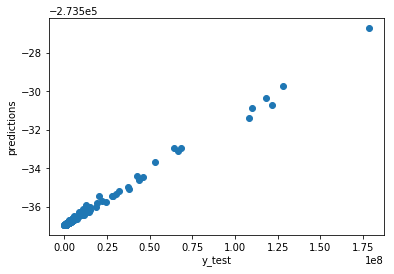

In [44]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)

#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())

In [45]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,estimate,Prediction,Actual,Variance
239,555670.00,-273536.92,469792.50,-743329.42
544,2450688.54,-273536.82,1388888.87,-1662425.69
768,2204249.05,-273536.83,1750000.00,-2023536.83
212,354472.00,-273536.93,311986.00,-585522.93
722,260072.40,-273536.94,225289.00,-498825.94


In [46]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.981339094496976
0.9947888500514938
0.9930148389566893


### Test size as 0.3

train r2 score before ss:  0.9885881825520435
test r2 score before ss:  0.9972276979025956
CVV as 5:  [0.99259004 0.99615958 0.99851961 0.97126149 0.99885069]
Mean Square error is : 18753354.30692943
R^2 score after ss train  : -0.13105464226564711
R^2 score after ss test : -0.08873425514573197
Cross val score train:  0.987582192647557
Cross Val score test:  0.9914762820160808


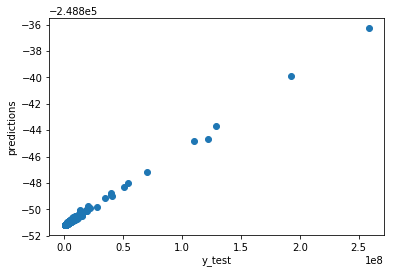

In [47]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)
#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())



In [48]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,estimate,Prediction,Actual,Variance
563,302853.60,-248851.19,209620.00,-458471.19
1425,589625.24,-248851.17,639412.88,-888264.05
120,495393.75,-248851.18,683925.00,-932776.18
1635,551721.50,-248851.17,542994.35,-791845.52
489,657430.00,-248851.17,671325.95,-920177.12


In [49]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.981339094496976
0.9947888500514938
0.9930148389566893


### Test size as 0.1

train r2 score before ss:  0.9915149747657069
test r2 score before ss:  0.989391754329754
CVV as 5:  [0.99093215 0.94366873 0.97854118 0.99612782 0.99164993]
Mean Square error is : 17944409.68692801
R^2 score after ss train  : -0.11141351554974865
R^2 score after ss test : -0.17503636617156282
Cross val score train:  0.9909056193370258
Cross Val score test:  0.9801839639867254


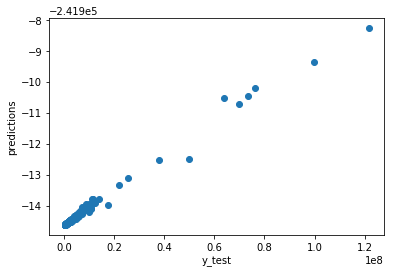

In [50]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("train r2 score before ss: ",lr.score(X_train, y_train))
print("test r2 score before ss: ", lr.score(X_test, y_test))

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = ss.fit_transform(X_train_scaled, y_train)

#  Plot predictions
predictions = lr.predict(X_test_scaled)

plt.scatter(y_test, predictions)
plt.xlabel('y_test')

plt.ylabel('predictions')

# CVV, MSE ad R2 score
print('CVV as 5: ', cross_val_score(lr, X_test_scaled, y_test, cv=5))
print("Mean Square error is :", np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("R^2 score after ss train  :", r2_score(y_train, lr.predict(X_train_scaled)))
print("R^2 score after ss test :", r2_score(y_test, lr.predict(X_test_scaled)))
pd.DataFrame({'variable': X.columns, f'_coefficient': lr.coef_}).sort_values(by=f'_coefficient')
print('Cross val score train: ',cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean())
print("Cross Val score test: ", cross_val_score(LinearRegression(), X_test_scaled, y_test, cv=5).mean())




In [51]:
test_dataSet = X_test.copy()
test_dataSet['Prediction']= predictions

test_dataSet['Actual'] = y_test
test_dataSet['Variance'] = predictions - y_test

test_dataSet.head()

,estimate,Prediction,Actual,Variance
929,4676205.55,-241914.37,4165121.12,-4407035.49
744,1873414.55,-241914.53,1603286.66,-1845201.19
962,1914000.00,-241914.53,1841385.45,-2083299.98
733,677614.00,-241914.60,603661.00,-845575.60
1254,997101.60,-241914.58,857456.50,-1099371.08


In [52]:
kf =KFold(n_splits=3, shuffle=True, random_state=42)

for train_indices, test_indices in kf.split(X, y):
#     print('train' ,train_indices)
#     print('test' ,test_indices)
#     print('')
    X_train_fold = X.loc[train_indices, :] 
    X_test_fold = X.loc[test_indices, :]
    y_train_fold = y[train_indices] 
    y_test_fold = y[test_indices]
    fold_lr = LinearRegression()
    fold_lr.fit(X_train_fold, y_train_fold)
    print(fold_lr.score(X_test_fold, y_test_fold))

0.981339094496976
0.9947888500514938
0.9930148389566893
